# Lasso linear regression example

**Example using the lasso linear regression function in the stepAIC package**

The **lasso** function in the stepAIC package provides output of regression models and summary statistics using the following four methods from the sklearn.linear_model package:

- LassoCV: Lasso using Cross-Validation with coordinate descent  
- LassoLarsCV: Lasso using Cross-Validation with Least Angle Regression
- LassoLarsIC using AIC: Lasso using Least Angle Regression with Akaike Information Criterion
- LassoLarsIC using BIC: Lasso using Least Angle Regression with Bayesian Information Criterion

This example follows the tutorial and produces the figures described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

In addition, the **lasso** function in stepAIC also displays the output of regression summary statistics and best-fit coefficients 

Before running this notebook, first install the stepAIC package in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In this example we will use the diabetes data set from sklearn

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In addition, we add some random features to the original data to better illustrate the feature selection performed by the Lasso model

In [3]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 5
X_random = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
X = pd.concat([X, X_random], axis=1)
# # Show only a subset of the columns
# X[X.columns[::3]].head()
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,random_00,random_01,random_02,random_03,random_04
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.465649,-0.225776,0.067528,-1.424748,-0.544383


Finally, we will use the **lasso** function in stepAIC to fit the Lasso regression models and display the figures that are shown in the sklearn tutorial. In addition, we will also display the summary statistics of the regression results for the best fit models, as well as the best-fit coefficients of each model.

Fitting Lasso regression models, please wait ...


Lasso regression statistics of best models in model_outputs['stats']:


| Statistic          |         LassoCV |     LassoLarsCV |    LassoLarsAIC |    LassoLarsBIC |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     1.28617     |     1.25903     |     0.921843    |     4.22304     |
| r-squared          |     0.51347     |     0.513599    |     0.514973    |     0.494804    |
| adjusted r-squared |     0.501024    |     0.501156    |     0.502565    |     0.487836    |
| nobs               |   442           |   442           |   442           |   442           |
| df residuals       |   431           |   431           |   431           |   436           |
| df model           |    10           |    10           |    10           |     5           |
| F-statistic        |    45.4865      |    45.51        |    45.761       |    85.4064      |
| Prob (F-statistic) |

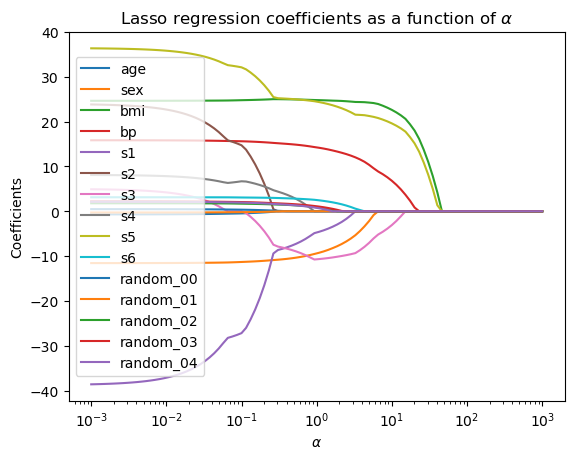

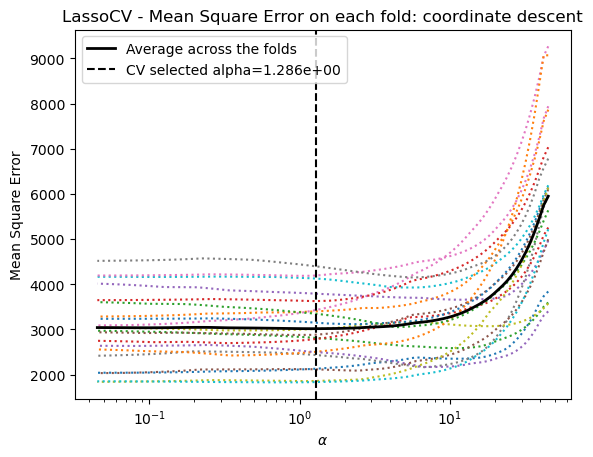

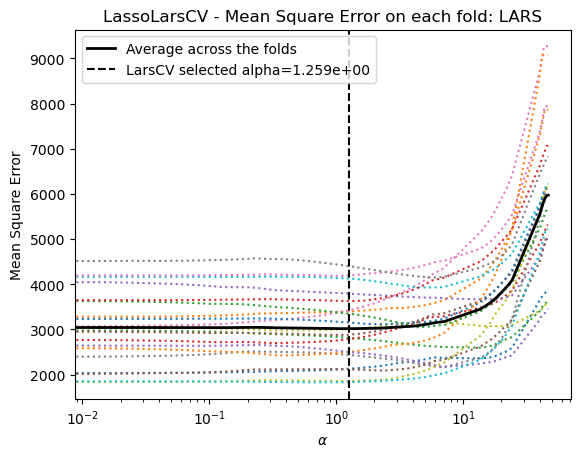

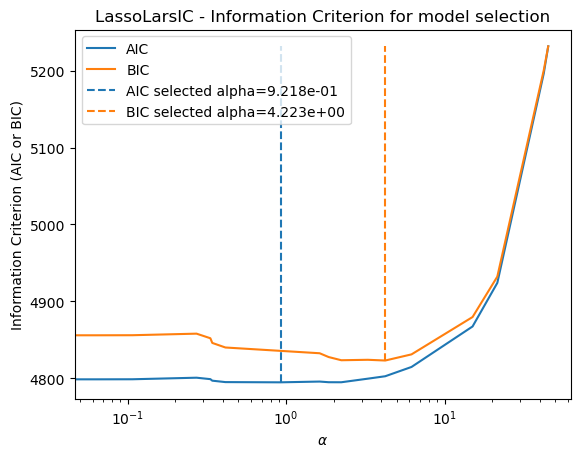

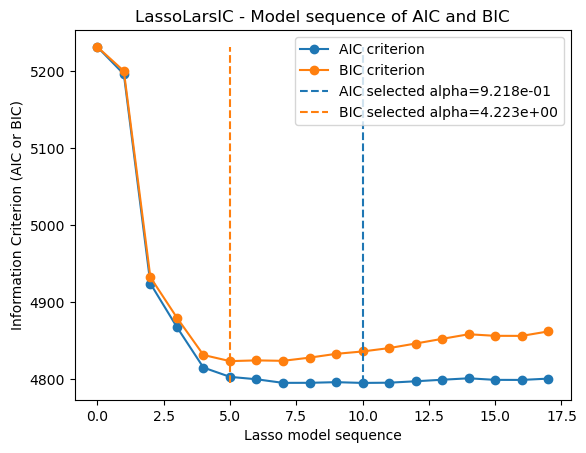

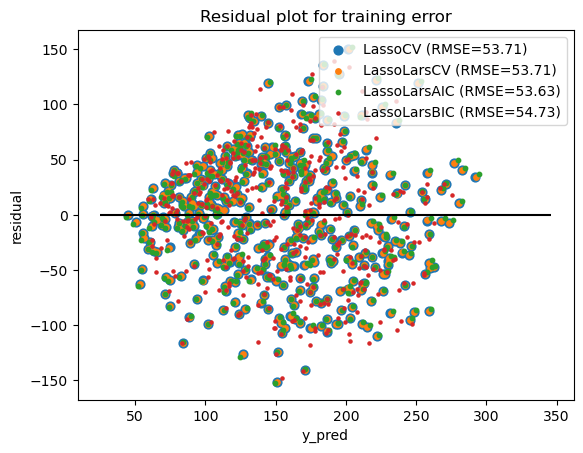

In [4]:
from stepAIC import lasso

model_objects, model_outputs = lasso(X, y)

Note that the most parsimonious model was found using LassoLarsIC with BIC as the criterion. If the goal of the study is to find the most parsimonious model with the smallest subset of features, then using BIC as the criterion appears to provide the best results.